# DENVER Airport DELAY

DEN_airport dataset has 39691 instances and 8 different features. The objective is to forecast whether a particular flight will experience a delay, utilizing details regarding its scheduled departure time.

Dataset is available:
https://github.com/alex80ds/Boulder-CU/blob/main/DEN_airport.csv

Jupyter notebook available: https://github.com/alex80ds/Boulder-CU/blob/main/DEN_airport.ipynb

### Prepairing data

In [1]:
import pandas as pd
import numpy as np

In [2]:
url = 'https://raw.githubusercontent.com/alex80ds/Boulder-CU/main/DEN_airport.csv'
df = pd.read_csv(url)

In [3]:
df.shape

(39691, 8)

In [4]:
df.columns

Index(['Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Time',
       'Length', 'Delay'],
      dtype='object')

In [5]:
df.head()

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,US,498,DEN,CLT,3,55,179,0
1,B6,98,DEN,JFK,3,59,213,0
2,UA,576,SEA,DEN,3,331,159,0
3,OO,6644,TUS,DEN,3,333,112,0
4,OO,6647,BZN,DEN,3,345,107,0


In [6]:
df.describe()

,Flight,DayOfWeek,Time,Length,Delay
count,39691.000000,39691.000000,39691.000000,39691.000000,39691.000000
mean,2718.847371,3.929480,803.589176,139.994634,0.455746
std,2740.756304,1.917245,276.687937,53.674207,0.498044
min,3.000000,1.000000,25.000000,0.000000,0.000000
25%,495.500000,2.000000,573.000000,108.000000,0.000000
50%,987.000000,4.000000,792.000000,137.000000,0.000000
75%,6468.000000,5.000000,1040.000000,163.000000,1.000000
max,7378.000000,7.000000,1439.000000,470.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39691 entries, 0 to 39690
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Airline      39691 non-null  object
 1   Flight       39691 non-null  int64 
 2   AirportFrom  39691 non-null  object
 3   AirportTo    39691 non-null  object
 4   DayOfWeek    39691 non-null  int64 
 5   Time         39691 non-null  int64 
 6   Length       39691 non-null  int64 
 7   Delay        39691 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 2.4+ MB


In [8]:
df['Airline'].value_counts()

OO    12586
UA     8468
WN     8337
F9     5626
DL     1207
AA      858
US      754
CO      729
MQ      432
FL      246
AS      184
B6      165
EV       65
OH       24
XE        6
YV        4
Name: Airline, dtype: int64

In [9]:
df['AirportFrom'].value_counts()

DEN    19843
LAX      768
PHX      684
SLC      681
LAS      623
       ...  
PHF       14
GRR        5
LIH        4
KOA        4
BKG        2
Name: AirportFrom, Length: 121, dtype: int64

In [10]:
df['AirportTo'].value_counts()

DEN    19848
LAX      776
PHX      682
SLC      647
LAS      632
       ...  
PHF       14
GRR        5
LIH        4
KOA        4
BKG        2
Name: AirportTo, Length: 121, dtype: int64

### Exploratory Data Analysis

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

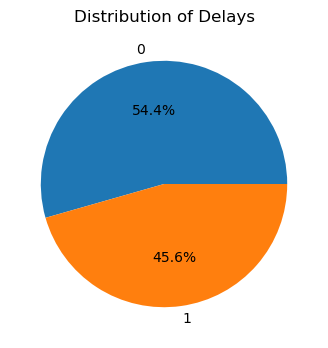

In [12]:
delay_counts = df['Delay'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(delay_counts, labels=delay_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Delays')
plt.show()

Almost half of flights are delayed

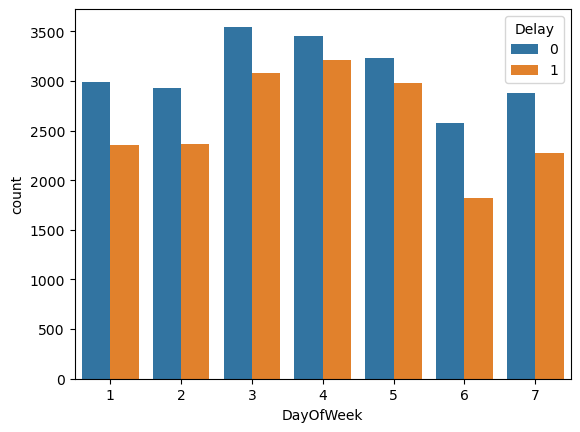

In [13]:
sns.countplot(data=df, x='DayOfWeek', hue='Delay');

No direct dependence on day of week.

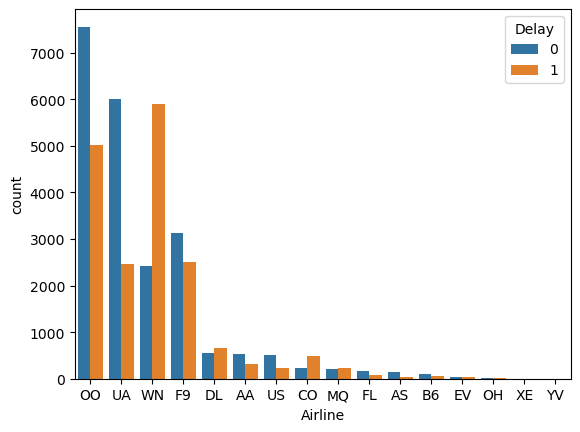

In [14]:
airline_counts = df['Airline'].value_counts()
df_sorted = df[df['Airline'].isin(airline_counts.index)].sort_values(by='Airline', key=lambda x: -airline_counts[x])
sns.countplot(data=df_sorted, x='Airline', hue='Delay');

We can see that we have some Airlines that has more delay than anothers, like WN, if you catch a fly from WN, probably your flight will be delayed.

<AxesSubplot:>

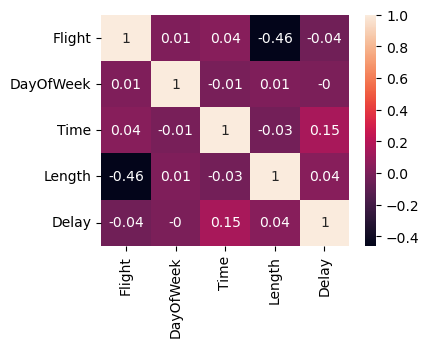

In [15]:
corr=df.corr().round(2)
plt.figure(figsize=(4,3))
sns.heatmap(corr,annot=True)

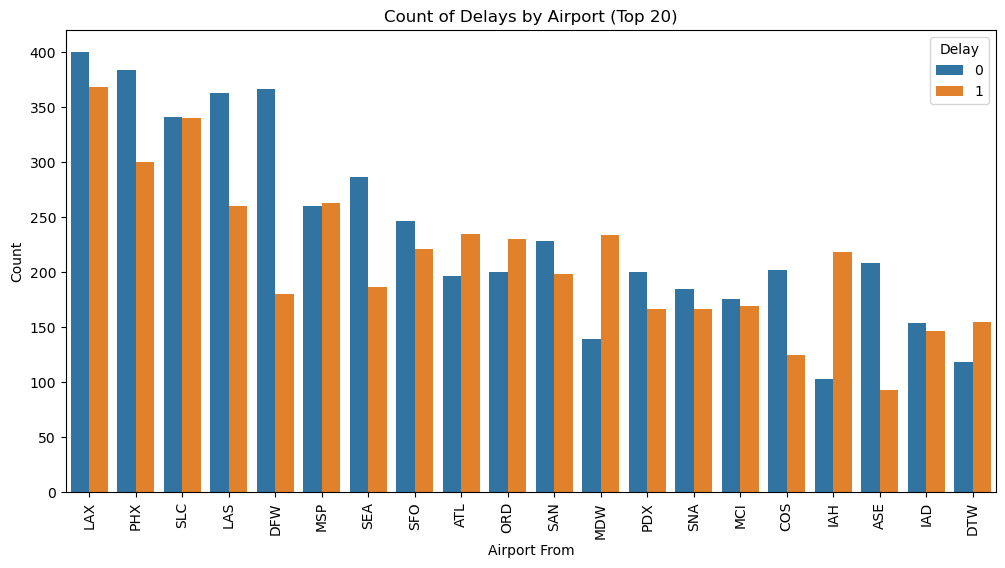

In [16]:
airport_counts = df['AirportFrom'].value_counts()

top_airports = airport_counts.index[1:21]

df_top_airports = df[df['AirportFrom'].isin(top_airports)]

plt.figure(figsize=(12, 6))
sns.countplot(data=df_top_airports, x='AirportFrom', hue='Delay', order=top_airports)
plt.title('Count of Delays by Airport (Top 20)')
plt.xlabel('Airport From')
plt.ylabel('Count')
plt.xticks(rotation=90) 
plt.legend(title='Delay') 
plt.show()

We see several airports with high probability of delays. For example MDW, IAH, ATL, ORD, DTW

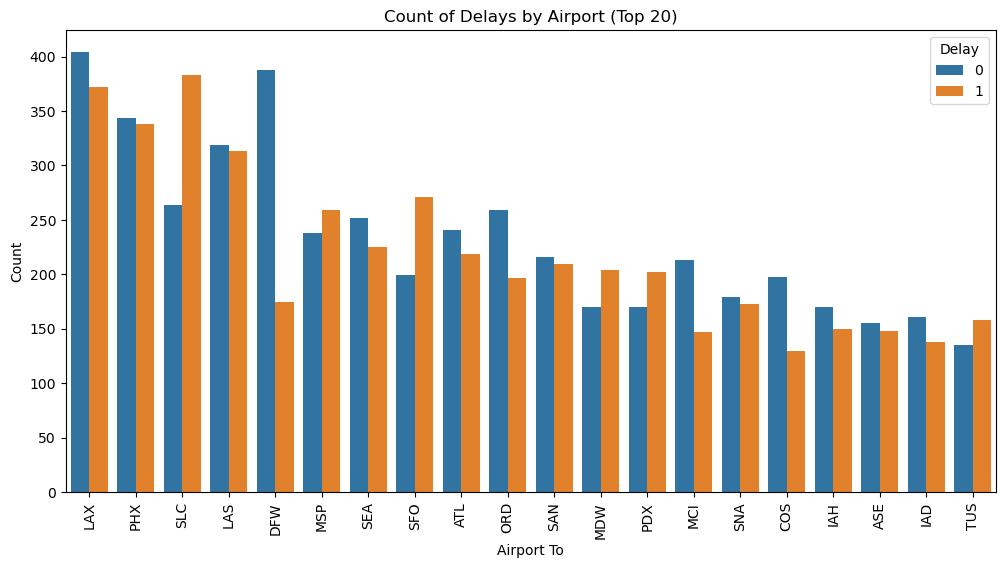

In [17]:
airport_counts1 = df['AirportTo'].value_counts()

top_airports1 = airport_counts1.index[1:21]

df_top_airports1 = df[df['AirportTo'].isin(top_airports1)]

plt.figure(figsize=(12, 6))
sns.countplot(data=df_top_airports1, x='AirportTo', hue='Delay', order=top_airports1)
plt.title('Count of Delays by Airport (Top 20)')
plt.xlabel('Airport To')
plt.ylabel('Count')
plt.xticks(rotation=90) 
plt.legend(title='Delay') 
plt.show()

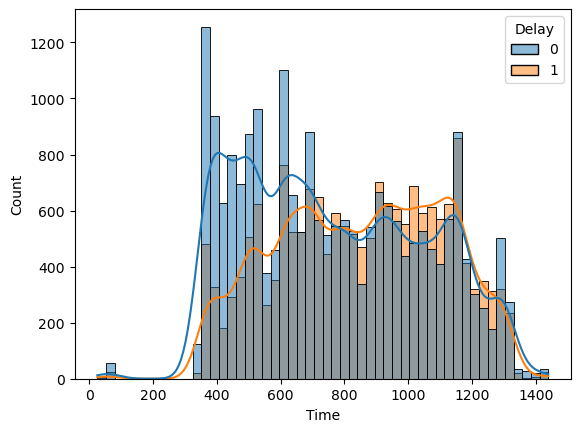

In [18]:
sns.histplot(data=df, x='Time', hue='Delay', kde=True);

No direct dependence on departure time.

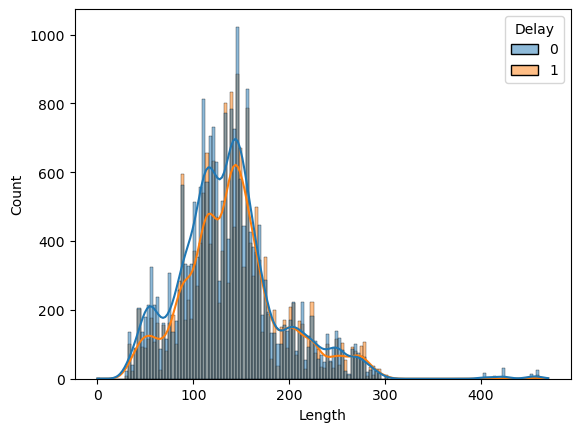

In [19]:
sns.histplot(data=df, x='Length', hue='Delay', kde=True);

No direct dependence on lenght.

### Data preprocessing

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
encoded_features = pd.DataFrame(encoder.fit_transform(df[['Airline', 'AirportFrom', 'AirportTo']]),
                                columns=encoder.get_feature_names_out(['Airline', 'AirportFrom', 'AirportTo']))

processed_data = pd.concat([df.drop(['Airline', 'AirportFrom', 'AirportTo'], axis=1), encoded_features], axis=1)

X = processed_data.drop('Delay', axis=1)
y = processed_data['Delay']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set shape: {X_train.shape}')
print(f'Test set shape: {X_test.shape}')


Training set shape: (31752, 262)
Test set shape: (7939, 262)


### Building model

### Random forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("Best parameters for Random Forest:", grid_rf.best_params_)
print("Best score for Random Forest:", grid_rf.best_score_)

y_pred_rf = grid_rf.predict(X_test)

print(classification_report(y_test, y_pred_rf))

Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
Best score for Random Forest: 0.6660055816121709
              precision    recall  f1-score   support

           0       0.68      0.80      0.73      4414
           1       0.68      0.52      0.59      3525

    accuracy                           0.68      7939
   macro avg       0.68      0.66      0.66      7939
weighted avg       0.68      0.68      0.67      7939



### Logistic regression

In [22]:
from sklearn.linear_model import LogisticRegression

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

grid_lr = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)

grid_lr.fit(X_train, y_train)

print("Best parameters for Logistic Regression:", grid_lr.best_params_)
print("Best score for Logistic Regression:", grid_lr.best_score_)

y_pred_lr = grid_lr.predict(X_test)

print(classification_report(y_test, y_pred_lr))

Best parameters for Logistic Regression: {'C': 1, 'solver': 'liblinear'}
Best score for Logistic Regression: 0.6461330040405318
              precision    recall  f1-score   support

           0       0.68      0.75      0.71      4414
           1       0.64      0.55      0.59      3525

    accuracy                           0.66      7939
   macro avg       0.66      0.65      0.65      7939
weighted avg       0.66      0.66      0.66      7939



### Gradient boosting

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

grid_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=5, scoring='accuracy', n_jobs=-1)

grid_gb.fit(X_train, y_train)

print("Best parameters for Gradient Boosting:", grid_gb.best_params_)
print("Best score for Gradient Boosting:", grid_gb.best_score_)

y_pred_gb = grid_gb.predict(X_test)

print(classification_report(y_test, y_pred_gb))

Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best score for Gradient Boosting: 0.6627303332477865
              precision    recall  f1-score   support

           0       0.68      0.78      0.73      4414
           1       0.66      0.55      0.60      3525

    accuracy                           0.68      7939
   macro avg       0.67      0.66      0.66      7939
weighted avg       0.67      0.68      0.67      7939



### Conclusion

We've experimented with three different models: Random Forest, Logistic Regression, and Gradient Boosting. Unfortunately, none of them have yielded satisfactory accuracy. It's becoming evident that the dataset we're working with may not be suitable for achieving high predictive accuracy.

One approach we can take to address this challenge is to enhance our dataset by incorporating additional features that could potentially provide more insight into the reasons for flight delays. For instance, factors such as weather conditions, seasonal variations, or operational constraints might offer valuable insights into flight delays.

Upon conducting data visualization, we've observed certain patterns. Specifically, some airlines and airports seem to experience more delays compared to others. Interestingly, despite having similar counts of delays and non-delays, there are discrepancies across different airlines and airports.

While we've attempted to utilize machine learning models on our original dataset, including scaling the data, we haven't achieved satisfactory results in predicting flight delays. Consequently, we've tried creating new variables by grouping certain attributes like airlines and airport locations. However, even with these efforts, we've struggled to develop a robust model for predicting flight delays.

It's apparent that having more comprehensive information about flights, such as weather forecasts, seasonal variations, or other factors influencing air travel, could potentially lead to more accurate predictions. By incorporating these additional variables, we may improve our model's ability to forecast flight delays effectively.